# Анализ продаж компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** выявить определяющие успешность игры закономерности для планирования рекламных кампаний.

**Вопросы заказчика:**

1. Сколько игр выпускалось в разные годы?
2. Какие самые популяные платформы по продажам (топ-5)? За какой характерный срок появляются новые и исчезают старые платформы? 
3. Какие платформы являются потенциально прибыльными?
4. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
5. Какие самые популярные (прибыльные) жанры (топ-5)? Выделяются ли жанры с высокими и низкими продажами?
6. Какие самые популярные платформы (топ-5) в Северной Америке, Европе и Японии?
7. Какие самые популярные жанры (топ-5) в Северной Америке, Европе и Японии?
8. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
6. Явлвяются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми?
7. Явлвяются ли средние пользовательские рейтинги жанров Action и Sports  разными?

**Исходные данные:** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года (данные за 2016 год могут быть неполными).

<a id="doc"></a>
**Описание данных:**

* **`Name`** — название игры;
* **`Platform`** — платформа;
* **`Year_of_Release`** — год выпуска;
* **`Genre`** — жанр игры;
* **`NA_sales`** — продажи в Северной Америке (миллионы проданных копий);
* **`EU_sales`** — продажи в Европе (миллионы проданных копий);
* **`JP_sales`** — продажи в Японии (миллионы проданных копий);
* **`Other_sales`** — продажи в других странах (миллионы проданных копий);
* **`Critic_Score`** — оценка критиков (максимум 100);
* **`User_Score`** — оценка пользователей (максимум 10);
* **`Rating`** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Открытие файла с данными и изучение общей информации

**(1) Импортируем библиотеки Pandas и NumPy, подключаем модуль модуль Pyplot из библиотеки Matplotlib и модуль Stats из библиотеки SciPy:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

**(2) Cбрасываем ограничение на число выводимых столбцов таблицы:**

In [2]:
pd.set_option('display.max_columns', None)

**(3) Импортируем файл CSV-формата в датафрейм:**

In [3]:
try:
    data_games = pd.read_csv('other/documents/games.csv', sep=',')
except:
    data_games = pd.read_csv('/datasets/games.csv', sep=',')

**(4) Выведем первые строки таблицы:**

In [4]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---
**(5) Выведем сводную информацию по всему датасету:** <a id="datainfo"></a>

In [5]:
data_games.info()

print('\nВсего строк:', data_games.shape[0])
print('Всего столбцов:', data_games.shape[1])

print('\nКоличество явных дубликатов:', data_games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Всего строк: 16715
Всего столбцов: 11

Количество явных дубликатов: 0


---
**(6) Выведем информацию по количеству пропущенных значений в каждом столбце:** <a id="isna"></a>

In [6]:
print(data_games.isna().sum())

total_isna = []
for value in data_games.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Количество столбцов с пропущенными значениями: 6


In [7]:
check_one_isna = data_games[data_games['Name'].isna() == True]
check_one_isna

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
check_two_isna = data_games[data_games['Year_of_Release'].isna() == True]
check_two_isna

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


---
**(7) Проверим список уникальных значений столбца `Platform` на наличие неявных дубликатов:**

In [9]:
print('Количество уникальных значений:', data_games['Platform'].nunique())

print()

platform_name_sorted = data_games.sort_values(by='Platform', ascending=True)
platform_name_sorted = platform_name_sorted['Platform'].unique()

for name in platform_name_sorted:
    print(name)

Количество уникальных значений: 31

2600
3DO
3DS
DC
DS
GB
GBA
GC
GEN
GG
N64
NES
NG
PC
PCFX
PS
PS2
PS3
PS4
PSP
PSV
SAT
SCD
SNES
TG16
WS
Wii
WiiU
X360
XB
XOne


---
**(8) Проверим список уникальных значений столбца `Genre` на наличие неявных дубликатов:**

In [10]:
genre_name_sorted = data_games.sort_values(by='Genre', ascending=True)
genre_name_sorted = genre_name_sorted['Genre'].unique()

for name in genre_name_sorted:
    print(name)

Action
Adventure
Fighting
Misc
Platform
Puzzle
Racing
Role-Playing
Shooter
Simulation
Sports
Strategy
nan


---
**(9) Cгенерируем описательную статистику для числовых столбцов (на текущий момент) для проверки наличия аномальных значений (артефактов):**

In [11]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


---
**(10) Проверим столбцы `User_Score` и `Rating` на наличие аномальных значений (артефактов):**

In [12]:
data_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

---
**(11) Узнаем, за какой период представлены данные в датафрейме:**

In [14]:
print('Данные представлены за', data_games['Year_of_Release'].nunique(),\
      'лет: c', int(data_games['Year_of_Release'].min()), 'по', int(data_games['Year_of_Release'].max()), 'гг.')

print()

year_sorted = data_games.sort_values(by='Year_of_Release', ascending=True)
year_sorted = year_sorted['Year_of_Release'].unique()

for year in year_sorted:
    print(year)

Данные представлены за 37 лет: c 1980 по 2016 гг.

1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
nan


<a id="first_results"></a>
### <u>**Результаты и выявленные проблемы первичного анализа данных**</u>

1. Датафрейм состоит из **[16 715 строк](#datainfo)** и **[11 столбцов](#datainfo)** различных типов данных:

     * **float** (вещественные числа) - 6 столбцов; 
     * **object** (текстовые или смешанные числовые и нечисловые значения) - 5 столбцов;

2. Названия всех столбцов **содержат символы верхнего регистра**. Необходимо переименовать столбцы в соответствии со стилем "змеиного регистра".  

3. Выявлено **[6 столбцов с пропущенными значениями](#isna)**: `Name`, `Year_of_release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`, Обзор пропусков:

   * `Name` - **2 пропуска** (вероятная причина пропусков: технический сбой или человечечский фактор, строки с пропусками можно исключить из анализа по причине их малого количества);
    
   ---
   * `Year_of_release` - **269 пропусков** (вероятная причина пропусков: технический сбой или человеческий фактор, пропуски возможно заменить, если одна и та же игра выпускалась на разных платформах (т.е. есть несколько игр с одинаковым названием, но по сути эта игра одна), и есть информация о годе выпуска хотя бы одной из них. Необходим дополнительный анализ. В противном случае, пропуски будут оставлены.
    
    ---
    * `Genre` - **2 пропуска** (вероятная причина пропусков: технический сбой или человеческий фактор (пропуски совпадают с пропусками из столбца `Name`), строки с пропусками можно исключить из анализа по причине их малого количества);
    
    ---
    * `Critic_Score` - **8 578 пропусков** (пропуски могли возникнуть из-за ряда причин: игра не оценивалась критиками, т.к. она была непопулярной, критики не оценивали данную игру на конкртеной платформе, имел место человеческий фактор (невнесение данных) и т.д. Замена пропусков медианным значением или средним арифметическим не представляется возможным, т.к. существует высокая угроза искажения данных => строки можно оставить в текущем виде;
    
    ---
    * `User_Score` - **6 701 пропуск** (пропуски могли возникнуть из-за ряда причин: игра не оценивалась пользователями, т.к. она была непопулярной, пользователи не оценивали данную игру на конкртеной платформе, имел место человеческий фактор (невнесение данных) и т.д. Замена пропусков медианным значением или средним арифметическим не представляется возможным, т.к. существует высокая угроза искажения данных => строки можно оставить в текущем виде;
    
    ---
    * `Rating` - **6 766 пропусков** (поскольку рейтинг не измеряется числовыми значениями, то пропуски можно заполнить текстом "no info" (т.е. данные неизвестны или неопределены).

4. Наблюдается **несоответствие типа данных столбцов описанию из [документации](#doc)**:

    * `Year_of_release` - текущий тип данных **float** (вещественные числа) необходимо заменить на **int** (целые числа) *(**замена возможна только при заполнении всех пропусков**)*;
    * `User_Score` - текущий тип данных **object** (текстовые или смешанные числовые и нечисловые значения) необходимо заменить на **float** (вещественные числа);

5. **Явных дубликатов НЕ выявлено**;

6. **Неявных дубликатов НЕ выявлено**;

7. **Аномальные значения (артефакты) отсутствуют, НО** в столбце `User_Score` среди числовых значений **присутствует текст в виде аббревиатуры 'tbd'**;

8. Данные в датафрейме представлены **за 37 лет: c 1980 по 2016 гг.**

In [15]:
# зафиксируем размер датасета до начала предобработки

size_games = data_games.shape[0]
size_games

16715

## Шаг 2. Предобработка данных

**(1) Приведём названия столбцов к "змеиному (нижнему) регистру":**

In [16]:
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

---
**(2) Удалим строки с пропущенными значениями в столбцах `name` и `genre`:**

In [17]:
data_games.dropna(subset=['name'], inplace=True)
data_games.dropna(subset=['genre'], inplace=True)

---
**(3) Обработаем пропуски в столбце `year_of_release`:**

На примере двух игр (где есть пропуски) убедимся, что выпуск производился на разных платформах (и в строках с другими платформами указан год):

In [18]:
check_one_game = data_games[data_games['name'] == 'FIFA Soccer 2004']
check_one_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


*=> игра была выпущена в 2003 году*

In [19]:
check_two_game = data_games[data_games['name'] == 'PDC World Championship Darts 2008']
check_two_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


*=> игра была выпущена в 2008 году*

Теперь заполним пропуски на те года, которые стоят напротив одной и той же игры, выпущенной на разных платформах:

In [20]:
data_games.loc[data_games['year_of_release'].isna(), 'year_of_release'] = \
data_games.loc[data_games['year_of_release'].isna(), 'name'].map(data_games.groupby('name')['year_of_release'].max())

Проверим, как изменились данные:

In [21]:
check_three_game = data_games[data_games['name'] == 'FIFA Soccer 2004']
check_three_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [22]:
check_four_game = data_games[data_games['name'] == 'PDC World Championship Darts 2008']
check_four_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,2008.0,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


In [23]:
data_games['year_of_release'].isna().sum()

146

Осталось 146 пропусков => <u>изменение типа данных столбца невозможно</u>

---
**(4) Обработаем пропуски в столбце `rating`:**

In [24]:
data_games['rating'] = data_games['rating'].fillna('no info') 

---
**(5) Изменим тип данных столбцов `user_score` (изменение типа данных столбца `year_of_release` неосуществимо из-за наличия пропусков):**

Перед тем, как изменять тип данных, необходимо устранить текст в виде аббревиатуры **'tbd'**.

<u>TBD</u> — это аббревиатура, которая обозначает «To Be Determined». Это выражение используется в различных областях и означает, что некоторые детали еще не известны или не определены.

Строки, содержащие данную аббревиатуру, **можно заменить на пропуски (Nan)**:

In [25]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan, regex=True)

Теперь изменим тип данных:

In [26]:
data_games['user_score'] = data_games['user_score'].astype('float64')

---
**(6) Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`:**

In [27]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

---
**(7) Выведем обновлённую сводную информацию по всему датасету:**

In [28]:
data_games.info()

print('\nВсего строк:', data_games.shape[0])
print('Всего столбцов:', data_games.shape[1])

print('\nКоличество явных дубликатов:', data_games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB

Всего строк: 16713
Всего столбцов: 12

Количество явных дубликатов: 0


---
**(8) Выведем обновлённую сводную информацию по всему датасету:**

In [29]:
print(data_games.isna().sum())

total_isna = []
for value in data_games.isna().sum():
    if value != 0:
        total_isna.append(value)

print('\nКоличество столбцов с пропущенными значениями:', len(total_isna))

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
total_sales           0
dtype: int64

Количество столбцов с пропущенными значениями: 3


---
**(9) Выведем первые строки обновлённого датафрейма:**

In [30]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no info,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no info,31.38


<a id="preprocessing_results"></a>
### <u>**Результаты предобработки данных**</u>

1. Все столбцы приведены к нижнему регистру. Новые названия столбцов:

* `name` — название игры;
* `platform` — платформа;
* `year_of_release` — год выпуска;
* `genre` — жанр игры;
* `na_sales` — продажи в Северной Америке (миллионы проданных копий);
* `eu_sales` — продажи в Европе (миллионы проданных копий);
* `jp_sales` — продажи в Японии (миллионы проданных копий);
* `other_sales` — продажи в других странах (миллионы проданных копий);
* `critic_score` — оценка критиков (максимум 100);
* `user_score` — оценка пользователей (максимум 10);
* `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

2. Был проведён анализ пропусков в 6 столбцах: выдвинуты гипотезы по причинам их возникновения и приняты решения по дальнейшей работе с ними (подробнее см. [Результаты и выявленные проблемы первичного анализа данных](#first_results)  **Пропущенные значения заполнены** в тех местах, где в этом была необходимость и возможность. **Удалены пропущенные строки** в столбцах `name` и `genre` из-за их малого количества.

3. Строки, содержащие текст в виде аббревиатуры **'tbd'** в столбце `user_score` **заменены на пропуски (Nan)**.

4. **Тип данных** в столбце `user_score` **изменён**. Теперь он соответствуют описанию из [документации](#doc), и их можно использовать для дальнейшего анализа. В столбце `year_of_release` **тип данных изменить не удалось**, покольку остались пропуски, которые нельзя заполнить (подробнее см. [Результаты и выявленные проблемы первичного анализа данных](#first_results) и п. 3 текущего раздела).

5. Добавлен новый столбец `total_sales`, в котором содержится **информация о суммарных продажах во всех регионах**.

6. После проведённых манпуляций датафрейм имеет следующие параметры: **16 713 строк** и **12 столбцов** различных типов данных:

     * **float** (вещественные числа) - 8 столбцов; 
     * **object** (текстовые или смешанные числовые и нечисловые значения) - 4 столбца;

In [31]:
# проверка датасета data_games после предобработки данных

print(round(data_games.shape[0] / size_games, 2))
      
if round(data_games.shape[0] / size_games, 2) >= 0.9:
    print('\nДанные можно использовать для дальнейшего анализа')
else:
    print('\nДанные нельзя использовать для дальнейшего анализа')

1.0

Данные можно использовать для дальнейшего анализа


## Шаг 3. Исследовательский анализ данных

### 3.1 Количество выпущенных игр в разные годы

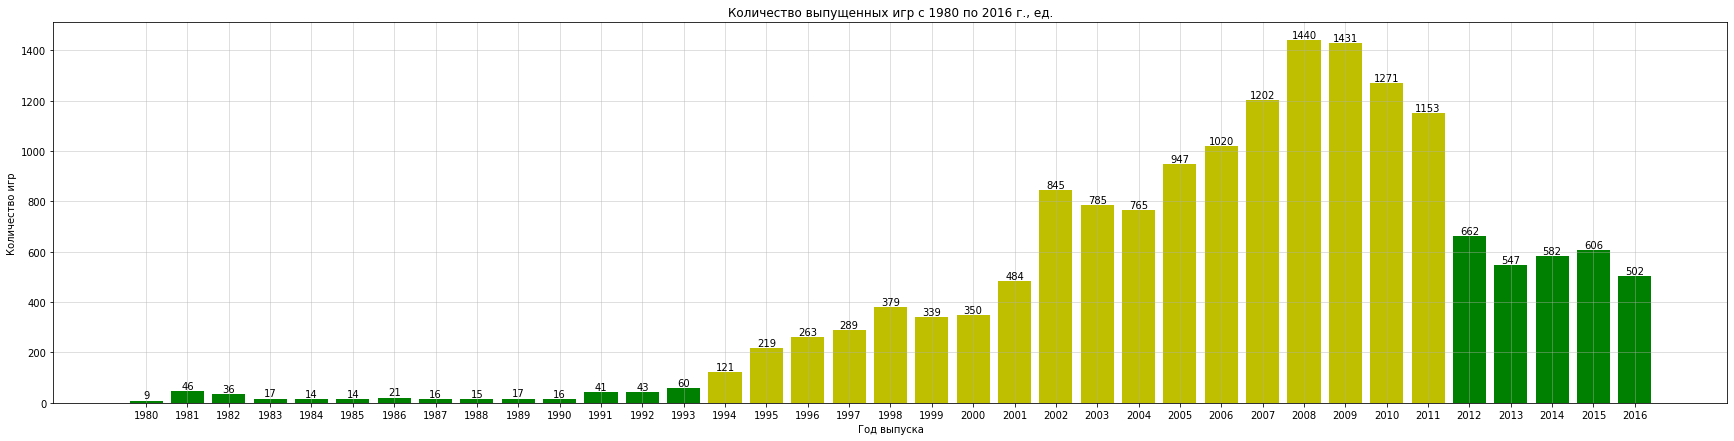

In [32]:
# сводная таблица

games_years = (
    data_games
    .pivot_table(index='year_of_release',
                 values='name',
                 aggfunc={'name': 'count'})
)

games_years = games_years.rename(columns={'name': 'number_of_games'})    
games_years = games_years.reset_index()

# график со значениями в натуральном выражении

year_of_release = games_years['year_of_release']
number_of_games = games_years['number_of_games']


plt.figure(figsize=(30,7))
plt.bar(year_of_release, number_of_games, color=['g','g','g','g','g','g','g','g','g','g','g','g','g','g','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','y','g','g','g','g'])
plt.xticks(np.arange(min(year_of_release), max(year_of_release)+1, 1)) 

for i in range(len(number_of_games)):
    plt.annotate(number_of_games[i], xy=(year_of_release[i], number_of_games[i]), ha='center', va='bottom')
   
plt.grid(alpha=0.5)
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.title('Количество выпущенных игр с 1980 по 2016 г., ед.')

plt.show()

<u>**Вывод:**</u> историю развития рынка компьютерных игр в течение рассматриваемого периода **(37 лет)** можн разделить на **3 периода**: **(1) "до 1994 года"**, **(2) "с 1994 по 2011 год"** и **(3) "после 2011 года"**. 

* C 1980 по 1993 год включительно число выпускаемых игр было ничтожно мало и варьировалось от 9 до 60 единиц в год. Это объясняется тем, что в то время компьютерные технологии были недостаточно развиты, и не каждый человек мог позволить себе персональный компьютер (ПК) или игровую приставку, а если и мог, то устройства того времени были весьма примитивными, а их мощности не позволяли разработчикам создавать более сложные по сюжету игры.

* Но в 1994 году число выпускаемых игр начало плавно увеличиваться, что можно связать c началом массового выпуска продвинутых игровых приставок (таких как Sony Playstation). Их возможности значительно расширились по сравнению с предшественниками, и это дало толчок к развитию игровой индустрии. В 2000-х годах в данной отрасли произошёл стремительный рост, который достиг своего пика в 2008 году (**1 440 ед.**). Это свзано с бумом в IT-индустрии в целом: ПК стали доступны для каждого человека, производились более мощные и продвинутые приставки и появлялось всё больше и больше высококвалифицированных специалистов в сфере геймдизайна. Одназначно, **промежуток с 1994 по 2011 год является "золотой эпохой" гейминдустрии**.

* С 2012 года наблюдается резкий спад, произошедший по причине уменьшения спроса. Причиной этому послужило бурное развитие индустрии мобильных устройств, а также социальных сетей. Интерес к играм, как к таковым, значительно не упал, просто большиство пользователей стали отдавать предпочтение играм не на ПК или приставке, а на планшете или смартфоне.

### 3.2 Продажи игр по платформам

**(1) Построим столбчатую (горизонтальую) диаграмму продаж по плаформам:**

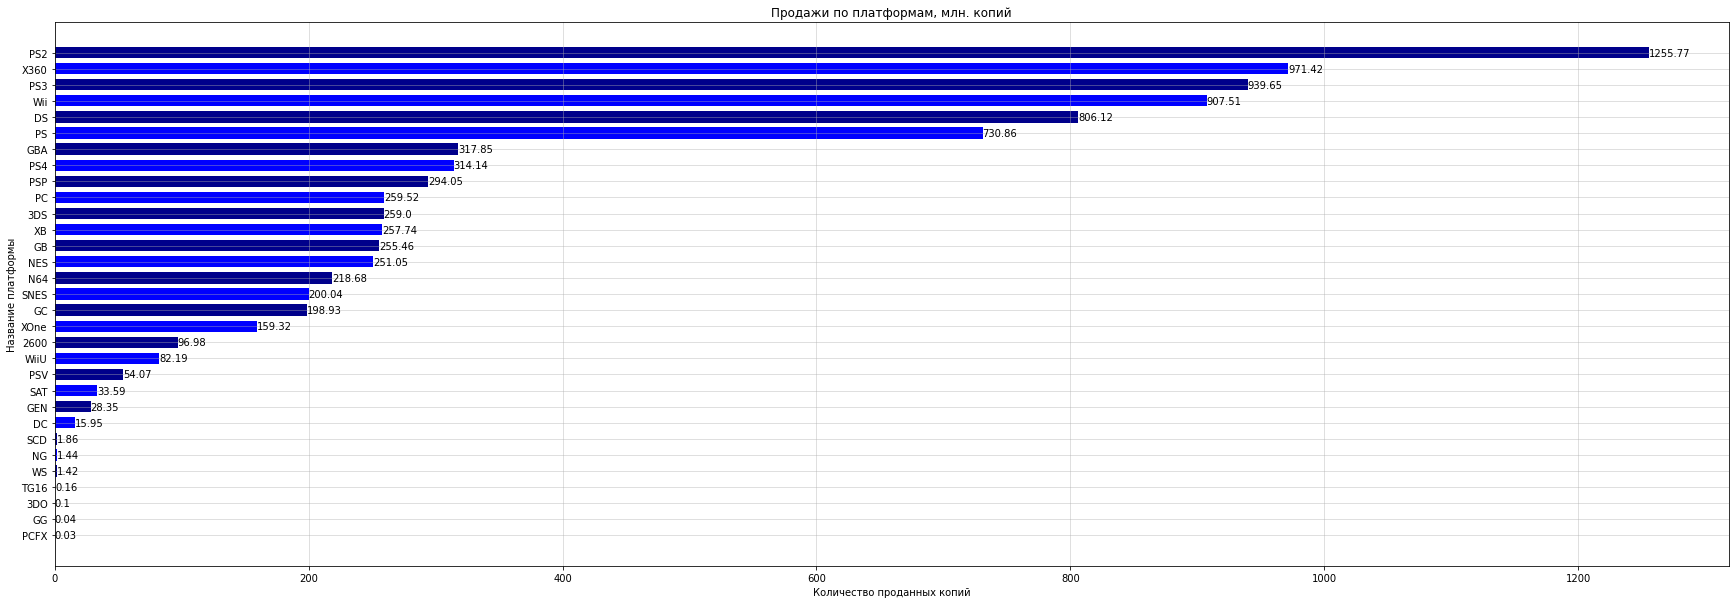

In [33]:
# сводная таблица

platform_sales = (
    data_games
    .pivot_table(index='platform',
                 values='total_sales',
                 aggfunc={'total_sales': sum})
)

platform_sales['total_sales'] = round(platform_sales['total_sales'], 2)
platform_sales = platform_sales.reset_index().sort_values(by='total_sales', ascending=True)

# график со значениями в натуральном выражении

platform = platform_sales['platform']
total_sales = platform_sales['total_sales']

plt.figure(figsize=(30,10))
plt.barh(platform, total_sales, height=0.7, color=['darkblue', 'blue'])

for i in range(len(total_sales)):
    plt.annotate(total_sales[i], xy=(total_sales[i],platform[i]), ha='left', va='center')
   
plt.grid(alpha=0.5)
plt.title('Продажи по платформам, млн. копий')
plt.xlabel("Количество проданных копий")
plt.ylabel("Название платформы")

plt.show()

<u>**Вывод:**</u> самые популярные платформы с 1980 по 2016 г. **(топ-5)**:

1. **PS2** (1 255,77 млн. проданных копий) - дата выхода: **2000 год**;
2. **X360** (971,42 млн. проданных копий) - дата выхода: **2005 год**;
3. **PS3** (939,65 млн. проданных копий) - дата выхода: **2006 год**;
4. **Wii** (907,51 млн. проданных копий) - дата выхода: **2006 год**;
5. **DS** (806,12 млн. проданных копий) - дата выхода: **2004 год**;

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Полностью поддерживаю! 

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Комментарий просмотрен.

---
🔷 **Предварительно для анализа решено взять данные с 2000 по 2016 год**, т.е. за все представленные года в 21 веке. Принято такое решение по следующим причинам:

* несмотря на то, что увеличение продаж началось с 1994 года, настоящий стремительный рост проявил себя именно в 2000-х гг., поскольку в конце 90-х сформировались благоприятные условия для развития индустрии компьютерных игр;
* в 2000 году была выпущена самая популярная платформа по количеству проданных копий - PS2.

---
**(2) Определим "срок жизни" каждой из платформ:**

Посчитаем ежгодное количество продаж самых популярных игровых платформ (топ-5) с 2000 по 2016 год и выведем результат в виде графика:

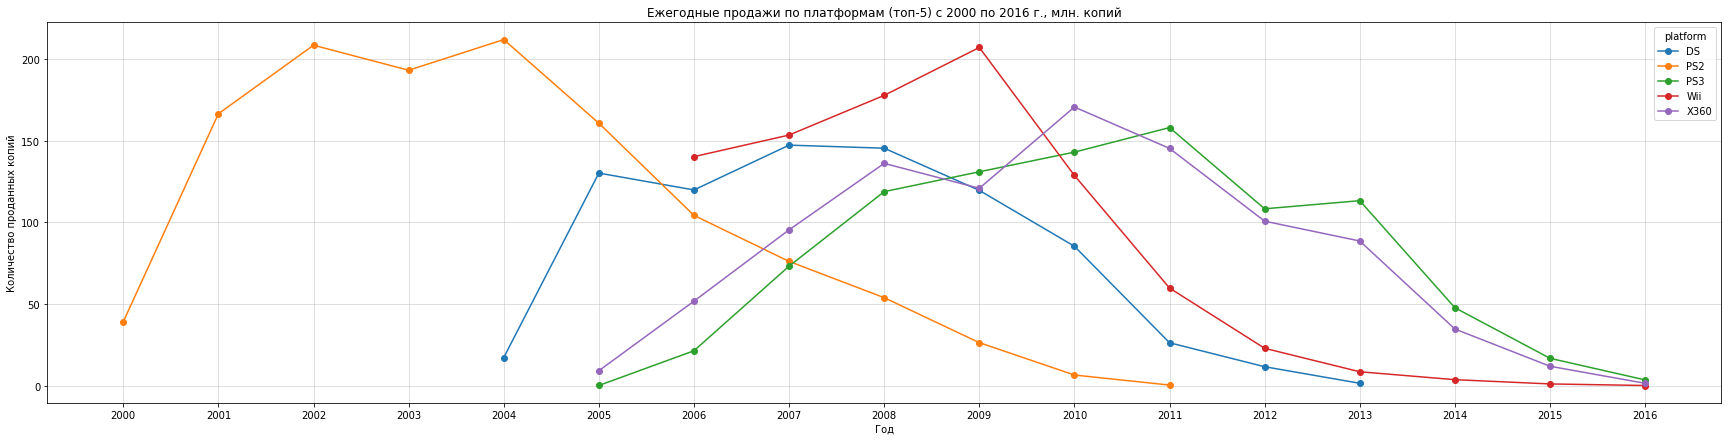

In [34]:
top5_platforms = data_games.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()

top5_platforms = (
    data_games
    .query('platform in @top5_platforms & year_of_release >= 2000')
    .pivot_table(index=['year_of_release'],
                 values='total_sales', 
                 columns='platform',
                 aggfunc={'total_sales': sum})
)

top5_platforms.plot(style='o-',
                    figsize=(30,7))

plt.xticks(np.arange(2000, 2016+1, 1)) 
plt.grid(alpha=0.5)
plt.title('Ежегодные продажи по платформам (топ-5) c 2000 по 2016 г., млн. копий')
plt.xlabel("Год")
plt.ylabel("Количество проданных копий")
plt.show()

<u>**Вывод:**</u> срок жизни каждой из платформ составляет примерно **9-10 лет**. В год выпуска платформы продажи игр обычно совсем малы, поскольку нет необходимого предложения со стороны гейминдустрии. Также причиной может быть то, что потенциальные покупатели сразу не бегут в магазин за новинкой (за только что вышедшей платформой), а предпочитают подождать с приобретением, так как либо им в текущий момент не позволяют финансы, либо им необходимо время, чтобы оценить целесообразность такой покупки. Исключение: игровая платформа Wii (в год релиза свопало несколько факторов: повышенная привлекательность приставки из-за инновационного контроллера, её стоимость была ниже конкурентов, а также было выпущено большое количество игр, и некоторые из них полагались к комплекту с самой приставкой). Но в следующие 2-3 года ситуация меняется и продажи игр резко возрастают. **Снижение популярности платформы происходит по-разному, но в среднем можно считать после примерно 5-6 лет**. Платформы устаревают, так как появляются новинки с более мощными процессорами, более привлекательным дизайном и более широкими возможностями для пользователя. Также существуют и другие причины, из-за которых популярность консоли снижается: переориентация общества на другие виды досуга (напр., социальные сети), появление других устройств с игровыми возможностями (напр. смартфоны и планшеты), снижение доходов населения при одновременном повышении стоимости платформы из-за дорогих комплектующих и т.д.

In [35]:
print('Средний срок жизни платформы (топ-5) составляет', top5_platforms.count().mean(), 'лет*.')

Средний срок жизни платформы (топ-5) составляет 11.4 лет*.


---
<a id="actual_period"></a>
🔶 **Приянято решение ИЗМЕНИТЬ актуальный период. Актуальным будем считать период с 2014 по 2016 год**, т.е. за последние 3 года, поскольку:

* многие новые платформы начали появляться в середине 2000-х гг. и их популярность начала снижаться к 2013-2014 гг.;
* индустрия компьютерных игр является динамично меняющейся, каждый год появляются новые тренды, именно поэтому для целей прогнозирования продаж нельзя брать слишком большой временной интервал.

<u>**Эти данные можно использовать для построения прогноза на 2017 год.**</u>

In [36]:
# сделаем срез акутального периода и выведем обновлённую информацию о данных

data_games = data_games.query('year_of_release >= 2014')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1690 non-null   object 
 1   platform         1690 non-null   object 
 2   year_of_release  1690 non-null   float64
 3   genre            1690 non-null   object 
 4   na_sales         1690 non-null   float64
 5   eu_sales         1690 non-null   float64
 6   jp_sales         1690 non-null   float64
 7   other_sales      1690 non-null   float64
 8   critic_score     719 non-null    float64
 9   user_score       889 non-null    float64
 10  rating           1690 non-null   object 
 11  total_sales      1690 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.6+ KB


### 3.3 Продажи по платформам: общая ситуация и потенциально прибыльные платформы

Проанализируем продажи с 2014 по 2016 год и определим, какие платформы лидируют по продажам, растут или падают. Выберем потенциально прибыльные платформы.

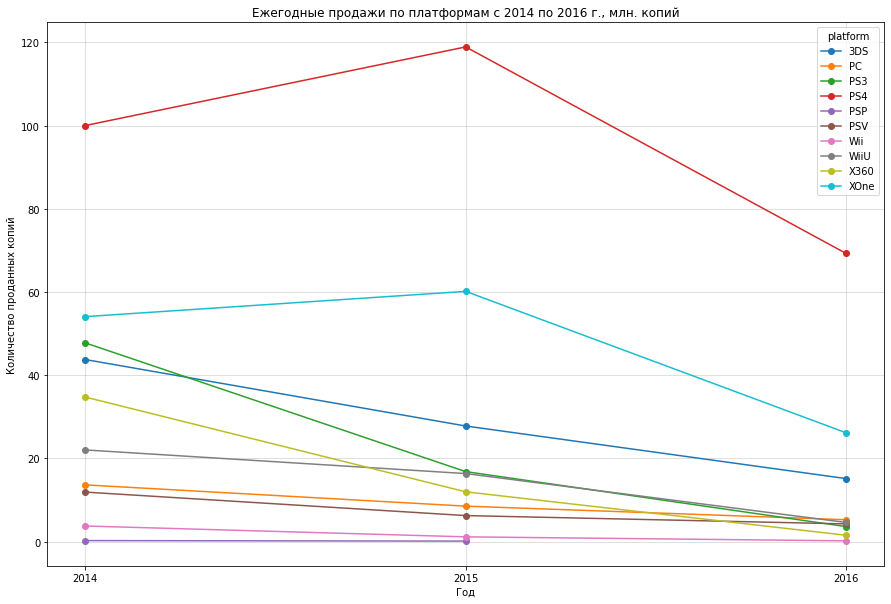

In [37]:
profit_platforms = (
    data_games
    .pivot_table(index=['year_of_release'],
                 values='total_sales', 
                 columns='platform',
                 aggfunc={'total_sales': sum})
)

profit_platforms.plot(style='o-',
                    figsize=(15,10))

plt.xticks(np.arange(2014, 2016+1, 1)) 
plt.grid(alpha=0.5)
plt.title('Ежегодные продажи по платформам c 2014 по 2016 г., млн. копий')
plt.xlabel("Год")
plt.ylabel("Количество проданных копий")
plt.show()

Для лучшей интерпретации результатов выведем данные за 2016 год:

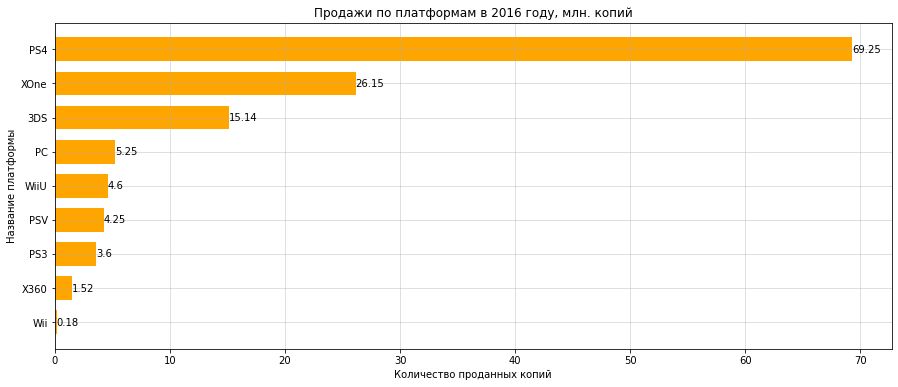

In [38]:
# сводная таблица

platform_sales = (
    data_games
    .query('year_of_release == 2016')
    .pivot_table(index='platform',
                 values='total_sales',
                 aggfunc={'total_sales': sum})
)

platform_sales['total_sales'] = round(platform_sales['total_sales'], 2)
platform_sales = platform_sales.reset_index().sort_values(by='total_sales', ascending=True)

# график со значениями в натуральном выражении

platform = platform_sales['platform']
total_sales = platform_sales['total_sales']

plt.figure(figsize=(15,6))
plt.barh(platform, total_sales, height=0.7, color='orange')

for i in range(len(total_sales)):
    plt.annotate(total_sales[i], xy=(total_sales[i],platform[i]), ha='left', va='center')
   
plt.grid(alpha=0.5)
plt.title('Продажи по платформам в 2016 году, млн. копий')
plt.xlabel("Количество проданных копий")
plt.ylabel("Название платформы")

plt.show()

<u>**Вывод:**</u> наблюдается общая тенденция снижения продаж, и в 2016 году такое снижения произошло по всем платформам. Потенциально прибыльными можно считать только 3 платформы:

* **PS4** (на 2016 год 69,25 млн. проданных копий) - дата выхода: **2013 год**, предполагаемый "срок жизни": **до 2022-2023 г.**
* **XOne** (на 2016 год 26,15 млн. проданных копий) - дата выхода: **2013 год**, предполагаемый "срок жизни": **до 2022-2023 г.**
* **3DS** (на 2016 год 15,14 млн. проданных копий) - дата выхода: **2011 год**, предполагаемый "срок жизни": **до 2020-2021 г.**

### 3.4 График "ящик с усами" по глобальным продажам игр в разбивке по платформам

Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам (данные за 2014-2016 гг.):

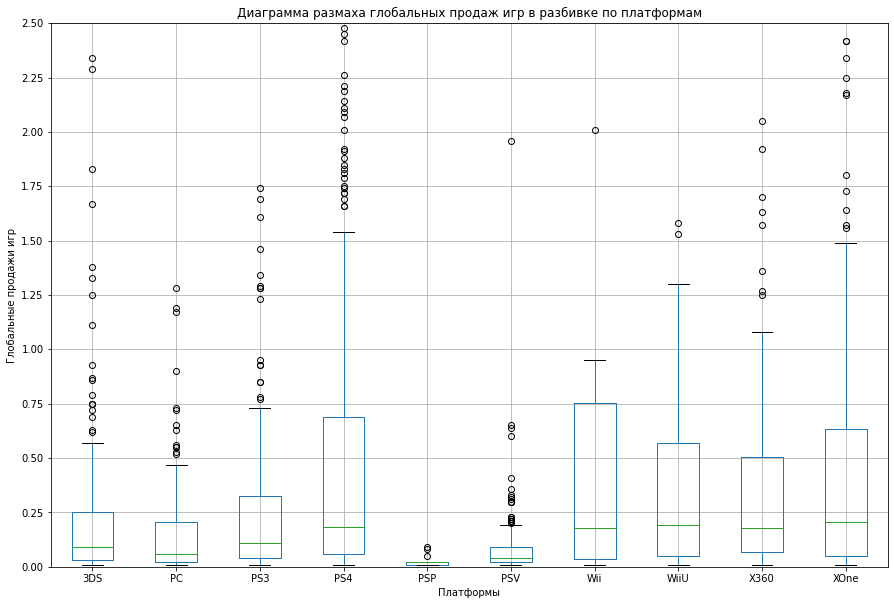

In [39]:
games_platforms = (
    data_games
    .pivot_table(index='name',
                 columns='platform',
                 values='total_sales', 
                 aggfunc ='sum')
    .plot(kind='box',
          grid=True,
          figsize=(15,10))
)

plt.ylim(0, 2.5)
plt.yticks(np.arange(0, 2.5+0.25, 0.25)) 
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи игр')
plt.show()

Для лучшей интерпретации результатов выведем данные описательной статистики:

In [40]:
data_games.groupby('platform')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,152.0,0.180263,0.328559,0.01,0.0200,0.060,0.2050,3.05
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96


<u>**Вывод:**</u> 

* Наибольшие медианные продажи (2014-2016 гг.) наблюдаются у платформ:

  * **XOne**
  * **WiiU**
  * **PS4**

Эти платформы являются флагманами на рынке гейминдустрии. Их широкие возможности позволяют создавать большое количество игр с уникальным и сложным сюжетом, при этом цена за одну игру всегда выше цены игр, предназначенных дла других консолей.

* Наименьшие медианные продажи (2014-2016 гг.) демонстрируют платформы:

  * **PSP**
  * **PSV**
  * **PC** (Персональный компьютер)

В случае c первыми двумя (PSP и PSV), все эти консоли являются портативными, они уступают в популярности своим стационарным конкурентам, их возможности значительно меньше и для них выпускается значительно меньше игр. Персональный компьютер сам по себе менее предназначен для игр, чем приставки, плюс, игры, выпускаемые на ПК стоят намного дешевле.

* Практически у всех платформ наблюдается большое число выбросов. Предполагаемое объяснение: игры шли в комплекте с приставкой или игры могли быть подарены в рамках рекламной акции.

### 3.5 Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

Для оценки влияния отзывов пользователей и критиков на продажи выберем платформу **PS4**.

---

**(1) Для выбранной платформы построим матрицу диаграмм рассеяния для столбцов:**

`total_sales` - суммарные продажи во всех регионах (млн. копий);

`critic_score` — оценка критиков (максимум 100);

`user_score` — оценка пользователей (максимум 10).

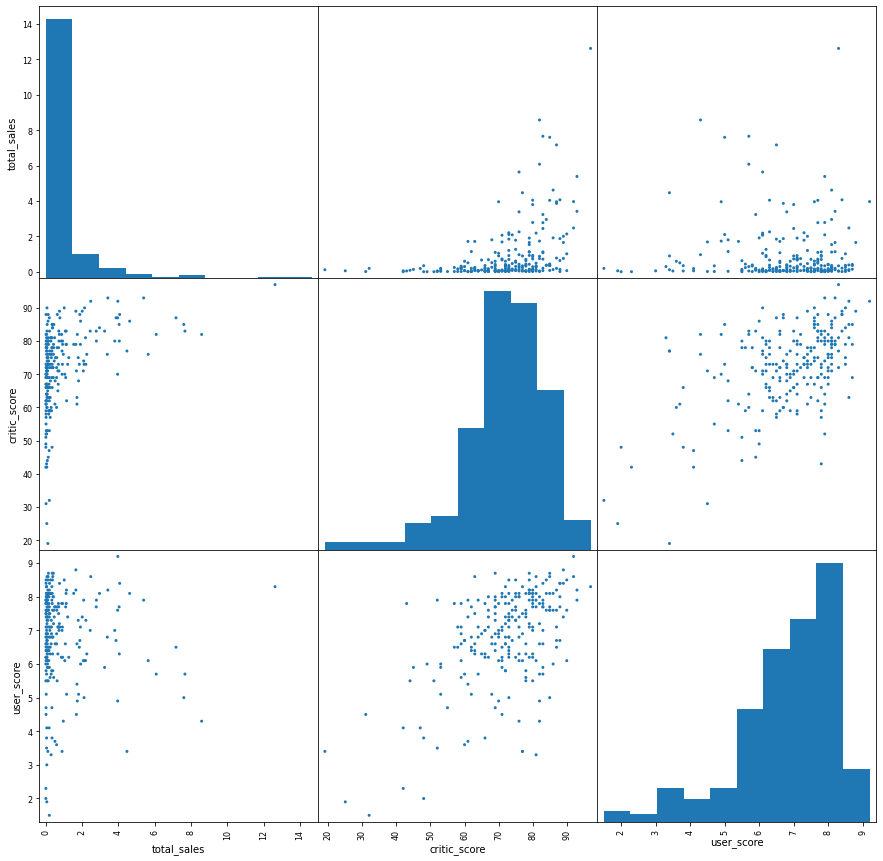

In [41]:
ps4 = data_games[data_games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']]

pd.plotting.scatter_matrix(ps4, figsize=(15,15), alpha=1)

plt.show()

Для лучшей интерпретации результатов выведем матрицу корреляции в табличной форме:

In [42]:
ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


<u>**Вывод:**</u> между параметрами `total_sales` и `critic_score` прослеживается **слабая** прямая связь (0,4) => можно утверждать, что **более высокая оценка критиков может повлиять на рост продаж, но этот фактор является далеко не первостепенным**. Между параметрами `total_sales` и `user_score` практически нет связи => **оценка пользователей никак не влияет на продажи**.

---
**(2) Соотнесём результаты с другими популярными платформами:**

***XOne***

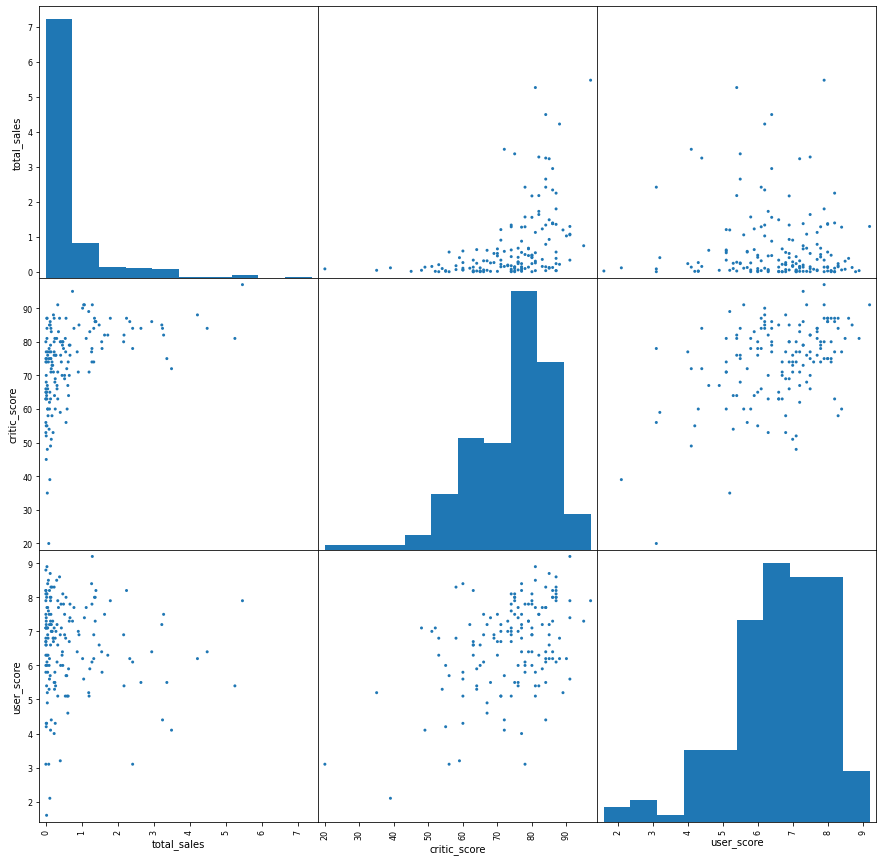

In [43]:
xone = data_games[data_games.platform == "XOne"][['total_sales', 'critic_score', 'user_score']]

pd.plotting.scatter_matrix(xone, figsize=(15,15), alpha=1)

plt.show()

In [44]:
xone.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


<u>**Вывод:**</u> между параметрами `total_sales` и `critic_score` прослеживается **слабая** прямая связь (0,4) => можно утверждать, что **более высокая оценка критиков может повлиять на рост продаж, но этот фактор является далеко не первостепенным**. Между параметрами `total_sales` и `user_score` практически нет связи => **оценка пользователей никак не влияет на продажи**.

***WiiU***

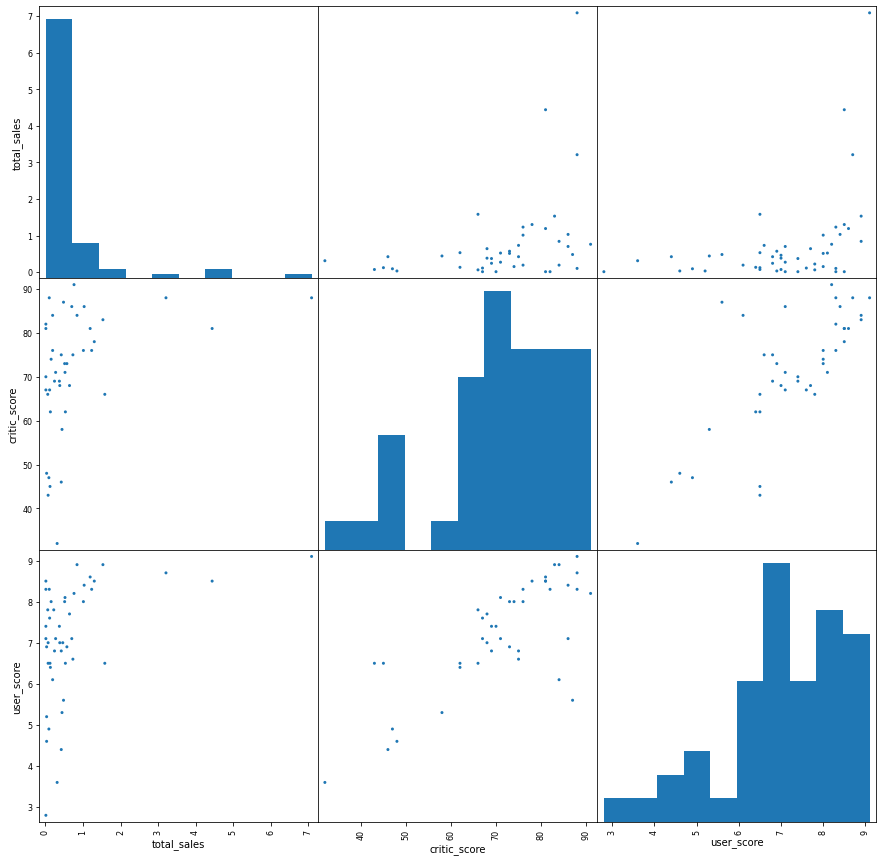

In [45]:
wiiu = data_games[data_games.platform == "WiiU"][['total_sales', 'critic_score', 'user_score']]

pd.plotting.scatter_matrix(wiiu, figsize=(15,15), alpha=1)

plt.show()

In [46]:
wiiu.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


<u>**Вывод:**</u> между параметрами `total_sales` и `critic_score` прослеживается **слабая** прямая связь (0,4) => можно утверждать, что **более высокая оценка критиков может повлиять на рост продаж, но этот фактор является далеко не первостепенным**. Между параметрами `total_sales` и `user_score` такая же связь и коэффиицент корреляции также (0,4) => **более высокая оценка пользователей может повлиять на рост продаж, этот фактор является не первостепенным**. Таким образом, получается,что значимость оценки критиков и оценки пользователей имеет одинаковое значение**.

---
<u>**Итоговый вывод:**</u> в целом по всем платформам за период с 2014 по 2016 г. прослеживается слабая прямая связь между оценкой критиков и продажами, т.е. **оценка критиков - это один из факторов, влияющих на увличение продаж игр**, чего не скажешь об оценках пользователей. Исключением стала платформа WiiU, где оценка пользователей более значима, чем оценка критиков, здесь также прослеживается слабая прямая связь.

### 3.6 Общее распределение игр по жанрам

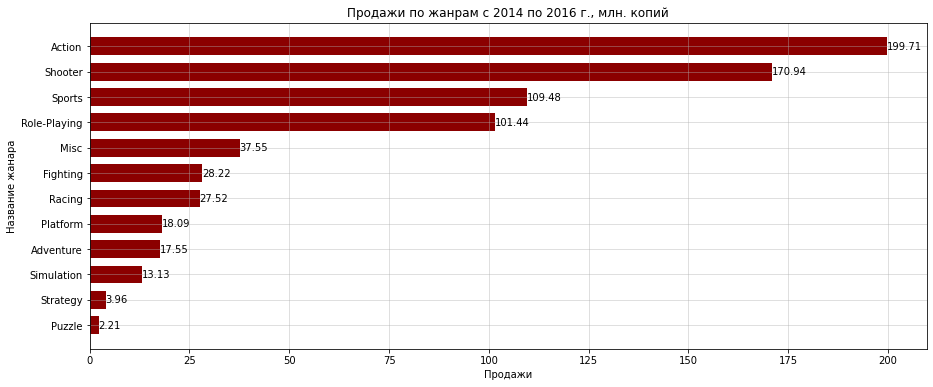

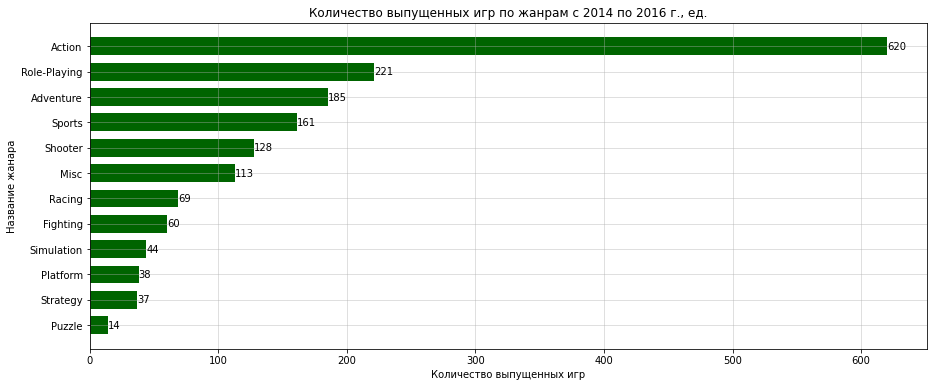

In [47]:
# (1) Распределение по продажам

# сводная таблица

genre_games = (
    data_games
    .pivot_table(index='genre',
                 values='total_sales',
                 aggfunc={'total_sales': sum})
)

genre_games['total_sales'] = round(genre_games['total_sales'], 2)
genre_games = genre_games.reset_index().sort_values(by='total_sales', ascending=True)

# график

genre = genre_games['genre']
total_sales = genre_games['total_sales']

plt.figure(figsize=(15,6))
plt.barh(genre, total_sales, height=0.7, color=['darkred'])

for i in range(len(total_sales)):
    plt.annotate(total_sales[i], xy=(total_sales[i],genre[i]), ha='left', va='center')
   
plt.grid(alpha=0.5)
plt.title('Продажи по жанрам с 2014 по 2016 г., млн. копий')
plt.xlabel("Продажи")
plt.ylabel("Название жанара")

plt.show()


# (2) Распределение по количеству

# сводная таблица

genre_games = (
    data_games
    .pivot_table(index='genre',
                 values='total_sales',
                 aggfunc={'total_sales': 'count'})
)

genre_games['total_sales'] = round(genre_games['total_sales'], 2)
genre_games = genre_games.reset_index().sort_values(by='total_sales', ascending=True)

# график

genre = genre_games['genre']
total_sales = genre_games['total_sales']

plt.figure(figsize=(15,6))
plt.barh(genre, total_sales, height=0.7, color=['darkgreen'])

for i in range(len(total_sales)):
    plt.annotate(total_sales[i], xy=(total_sales[i],genre[i]), ha='left', va='center')
   
plt.grid(alpha=0.5)
plt.title('Количество выпущенных игр по жанрам с 2014 по 2016 г., ед.')
plt.xlabel("Количество выпущенных игр")
plt.ylabel("Название жанара")

plt.show()

Построим график "ящик с усами" по глобальным продажам игр в разбивке по жанрам (данные за 2014-2016 гг.):

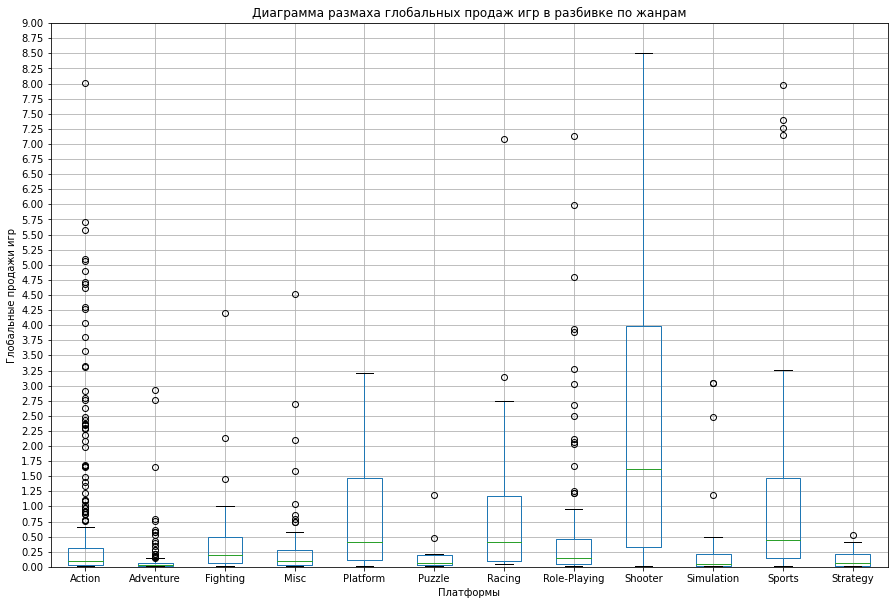

In [48]:
games_genre = (
    data_games
    .pivot_table(index='name',
                 columns='genre',
                 values='total_sales', 
                 aggfunc ='sum')
    .plot(kind='box',
          grid=True,
          figsize=(15,10))
)

plt.ylim(0, 2.5)
plt.yticks(np.arange(0, 9+0.25, 0.25)) 
plt.title('Диаграмма размаха глобальных продаж игр в разбивке по жанрам')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи игр')
plt.show()

Для лучшей интерпретации результатов выведем данные описательной статистики:

In [49]:
data_games.groupby('genre')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05
Action,620.0,0.322113,0.797537,0.01,0.0300,0.090,0.2800,12.62
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09


<u>**Вывод:**</u> безусловным лидером по продажам является жанр **Асtion** (жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, таких как зрительно-моторная координация и скорость реакции), за период с 2014 по 2016 г. было продано 199,71 млн. копий. В топ-5 также входят следующие жанры:

* **Shooter** (жанр компьютерных игр, в которых игровой процесс основывается на сражениях с использованием огнестрельного или любого другого оружия) - продано 170,94 млн. копий;
* **Sports** (спортивный симулятор) - продано 109,48 млн. копий;
* **Role-Playing** (жанр компьютерных игр, в котором игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений) - продано 101,44 млн. копий;
* **Misc** (оъединяет в себе несколько жанров) - продано 37,55 млн. копий.

На графике хорошо видно, что **выделяются жанры с самыми высокими продажами**.

Если мы рассматриваем жанры по количеству выпущенных игр, то тут также лидирует жанр **Асtion** (жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, таких как зрительно-моторная координация и скорость реакции), за период с 2014 по 2016 г. была выпущена 620 игр. С остальным топ-5 ситуация иная:

* **Role-Playing** (жанр компьютерных игр, в котором игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений) - выпущено 221 игра;
* **Adventure** (жанр компьютерных игр, представляющий собой интерактивную историю с главным героем, управляемым игроком) - выпущено 185 игр;
* **Sports** (спортивный симулятор) - выпущено 161 игра.;
* **Shooter** - выпущено 128 игр.

<u>Наибольшие медианные продажи (2014-2016 гг.) наблюдаются у жанров:</u>

* **Shooter** (жанр компьютерных игр, в которых игровой процесс основывается на сражениях с использованием огнестрельного или любого другого оружия)
* **Sports** (спортивный симулятор)
* **Platform** (жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня)
* **Fighting** (жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого ареной)
* **Role-Playing** (жанр компьютерных игр, в котором игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений)

<u>Наименьшие медианные продажи (2014-2016 гг.) наблюдаются у жанров:</u>

* **Adventure** (жанр компьютерных игр, представляющий собой интерактивную историю с главным героем, управляемым игроком)
* **Puzzle** (жанр компьютерных игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции)
* **Strategy** (жанр компьютерных игр, в котором игроку для победы необходимо применять стратегическое мышление)
* **Racing** (гонки)
* **Misc** (оъединяет в себе несколько жанров)
 
Таким образом, мы можем констатировать, что самым прибыльным жанром является жанр **Shooter**, а самым убыточным - **Adventure**.

<a id="research_results"></a>
### <u>**Результаты исследовательского анализа данных**</u>

1. Данные по рынку компьютерных игр разделили на **3 периода**: **(1) "до 1994 года"**, **(2) "с 1994 по 2011 год"** и **(3) "после 2011 года"**. Описаны все происходящие изменения в каждом периоде.

2. Самые популярные платформы с 1980 по 2016 г. **(топ-5)**:

   * **PS2** (1 255,77 млн. проданных копий) - дата выхода: **2000 год**;
   * **X360** (971,42 млн. проданных копий) - дата выхода: **2005 год**;
   * **PS3** (939,65 млн. проданных копий) - дата выхода: **2006 год**;
   * **Wii** (907,51 млн. проданных копий) - дата выхода: **2006 год**;
   * **DS** (806,12 млн. проданных копий) - дата выхода: **2004 год**;

3. Срок жизни каждой из платформ составляет примерно **9-10 лет**;

4. Актуальный периодом был выбран **период с 2014 по 2016 год**;

5. В 2014-2016 гг. наблюдается общая тенденция снижения продаж, и в 2016 году такое снижения произошло по всем платформам. Потенциально прибыльными можно считать только 3 платформы:

   * **PS4** (на 2016 год 69,25 млн. проданных копий) - дата выхода: **2013 год**, предполагаемый "срок жизни": **до 2022-2023 г.**
   * **XOne** (на 2016 год 26,15 млн. проданных копий) - дата выхода: **2013 год**, предполагаемый "срок жизни": **до 2022-2023 г.**
   * **3DS** (на 2016 год 15,14 млн. проданных копий) - дата выхода: **2011 год**, предполагаемый "срок жизни": **до 2020-2021 г.**

6. Наибольшие медианные продажи (2014-2016 гг.) наблюдаются у платформ:

   * **XOne**
   * **WiiU**
   * **PS4**

7. Наименьшие медианные продажи (2014-2016 гг.) демонстрируют платформы:

   * **PSP**
   * **PSV**
   * **PC** (Персональный компьютер)

8. В целом по всем платформам за период с 2014 по 2016 г. прослеживается слабая прямая связь между оценкой критиков и продажами, т.е. **оценка критиков - это один из факторов, влияющих на увличение продаж игр**, чего не скажешь об оценках пользователей. Исключением стала платформа WiiU, где оценка пользователей более значима, чем оценка критиков, здесь также прослеживается слабая прямая связь.

9. Жанры-лидеры по продажам за период с 2014 по 2016 г.:

   * **Асtion** - продано 199,71 млн. копий;
   * **Shooter** - продано 170,94 млн. копий;
   * **Sports** - продано 109,48 млн. копий;
   * **Role-Playing** - продано 101,44 млн. копий;
   * **Misc** - продано 37,55 млн. копий.


10. Жанры-лидеры по количеству выпущенных игр за период с 2014 по 2016 г.: 

    * **Асtion** - выпущено 620 игр;
    * **Role-Playing** - выпущена 221 игра;
    * **Adventure** - выпущено 185 игр;
    * **Sports** - выпущена 161 игра.;
    * **Shooter** - выпущено 128 игр.

11. Наибольшие медианные продажи (2014-2016 гг.) наблюдаются у жанров:

    * **Shooter**
    * **Sports** 
    * **Platform**
    * **Fighting**
    * **Role-Playing**

12. Наименьшие медианные продажи (2014-2016 гг.) наблюдаются у жанров:

    * **Adventure**
    * **Puzzle**
    * **Strategy**
    * **Racing**
    * **Misc**

13. Cамый прибыльный жанр - **Shooter**, а самый убыточный - **Adventure**.

## Шаг 4. Портрет пользователя каждого региона (NA, EU, JP)

<a id="top_platforms"></a>
### 4.1 Самые популярные платформы в регионах

In [50]:
# функция для формирования графиков

def top_region_sales(groupby, region_sales, ax):
    pivot = data_games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    region = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color = {'na_sales': 'green', 'eu_sales': 'darkblue', 'jp_sales': 'darkred'}
    plot = pivot.plot(kind='bar',
                      title=region[region_sales],
                      ax=axes[ax], 
                      color=color[region_sales], 
                      rot=0)
    plot.grid(alpha=0.5)
    plot.legend()
    plot.set_xlabel('Название платформы')
    plot.set_ylabel('Продажи')    

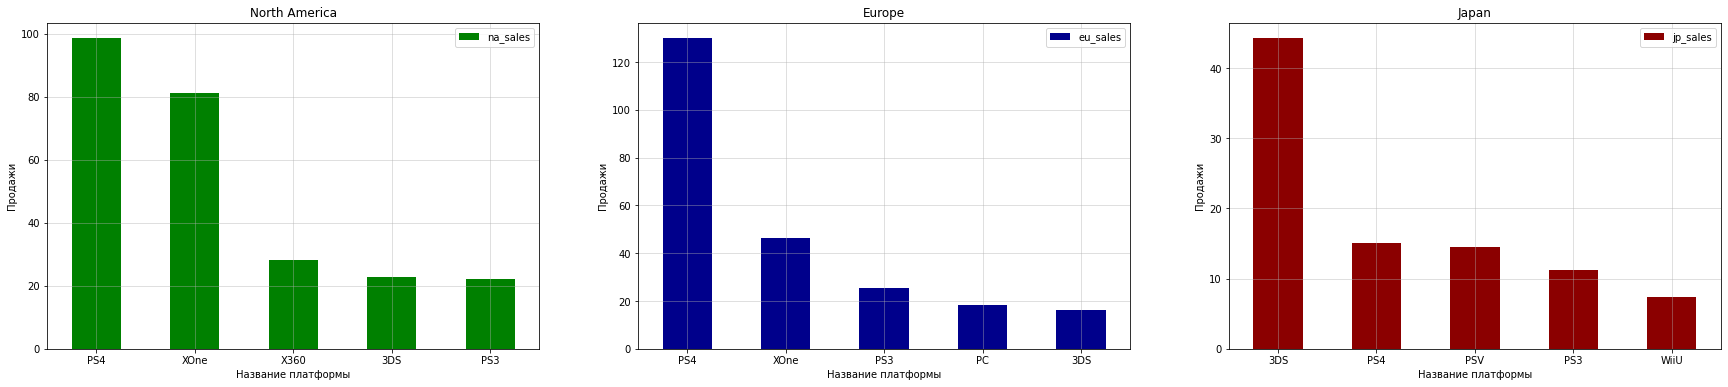

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))


top_region_sales('platform', 'na_sales', 0)
top_region_sales('platform', 'eu_sales', 1)
top_region_sales('platform', 'jp_sales', 2)

<u>**Вывод:**</u> Самые популярные платформы (топ-5) за период с 2014 по 2016 г.:

* Северная Америка (NA):

  * **PS4**
  * **XOne**
  * **X360**
  * **3DS**
  * **PS3**

* Европа (EU):

  * **PS4**
  * **XOne**
  * **PS3**
  * **PC** (Персональный компьютер)
  * **3DS**

* Япония (JP):

  * **3DS**
  * **PS4**
  * **PSV**
  * **PS3**
  * **WiUU**

Полученные результаты дают нам понять, что в Северной Америке и Европе предпочитают практические одни и те же платформы, однако в Европе многие играют в игры на персональном компбютере. Но в Японии совершенно другая ситуация. Японцы, по всей видимости, отдают предпочтение только приставкам собственного производства, в топ-5 не представлена ни одна платформа американской компании Xbox. Кроме того, 3-е место по популярности занимает портативная приставка PSV. Все это даёт нам право утверждать, что японский рынок игр является уникальным.

<a id="top_genres"></a>
### 4.2 Самые популярные жанры в регионах

In [52]:
# функция для формирования графиков

def top_region_sales(groupby, region_sales, ax):
    pivot = data_games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    region = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color = {'na_sales': 'green', 'eu_sales': 'darkblue', 'jp_sales': 'darkred'}
    plot = pivot.plot(kind='bar',
                      title=region[region_sales],
                      ax=axes[ax], 
                      color=color[region_sales], 
                      rot=0)
    plot.grid(alpha=0.5)
    plot.legend()
    plot.set_xlabel('Название жанра')
    plot.set_ylabel('Продажи')    

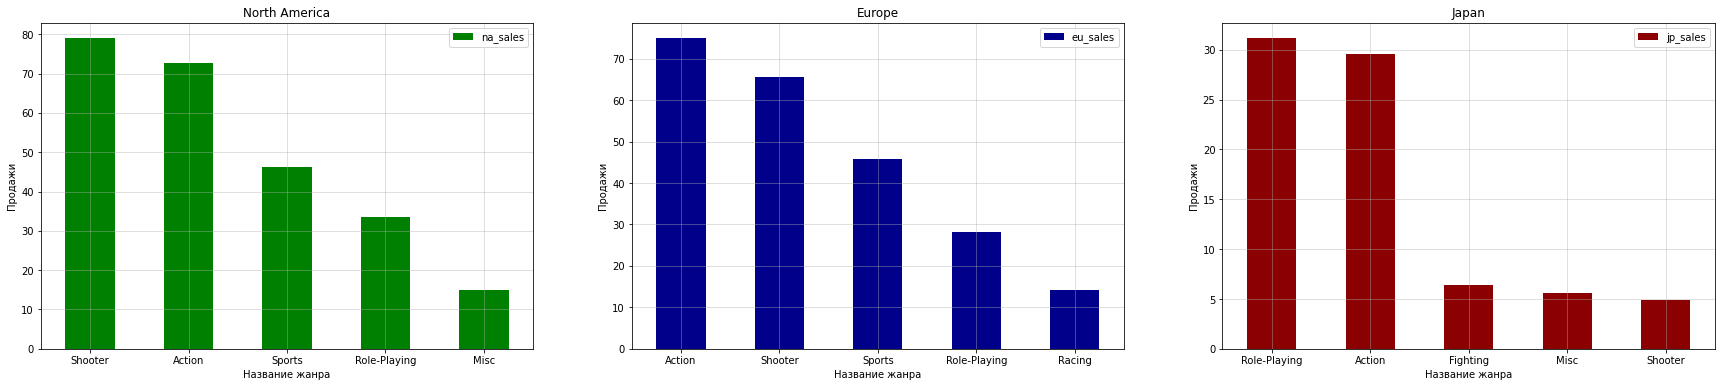

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))

top_region_sales('genre', 'na_sales', 0)
top_region_sales('genre', 'eu_sales', 1)
top_region_sales('genre', 'jp_sales', 2)

<u>**Вывод:**</u> и в Северной Америке и в Европе предпочтения по жанрам практически совпадают, однако в Европе любят игры жанра **Racing** (гонки), в то время как американцы больше играют в игры, объединяющие в себе несколько жанров (**Misc**). Японцы, как и в случае с платформами, показали совсем иной результат. В Японии геймеры больше всего играют в игры жанра **Role-Playing**, а также предпочитают жанр **Fighting** (жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого ареной).

<a id="rating"></a>
### 4.3 Влияние рейтинга ESRB на продажи

Для начала проясним, что такое ERSB.

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

Категории в наших данных:

* **`M`** - для детей от 17 лет и старше;
* **`E`** - для детей всех возрастов;
* **`E10+`** - для детей от 10 лет и старше;
* **`T`** - для детей от 13 лет и старше

In [54]:
data_games['rating'].unique()

array(['no info', 'M', 'E', 'T', 'E10+'], dtype=object)

Теперь узнаем от игр, с каким рейтингом, было полученое большее количество выручки:

In [55]:
# функция для формирования графиков

def top_region_sales(groupby, region_sales, ax):
    pivot = data_games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    region = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color = {'na_sales': 'green', 'eu_sales': 'darkblue', 'jp_sales': 'darkred'}
    plot = pivot.plot(kind='bar',
                      title=region[region_sales],
                      ax=axes[ax], 
                      color=color[region_sales], 
                      rot=0)
    plot.grid(alpha=0.5)
    plot.legend()
    plot.set_xlabel('Рейтинг ESRB')
    plot.set_ylabel('Продажи')    

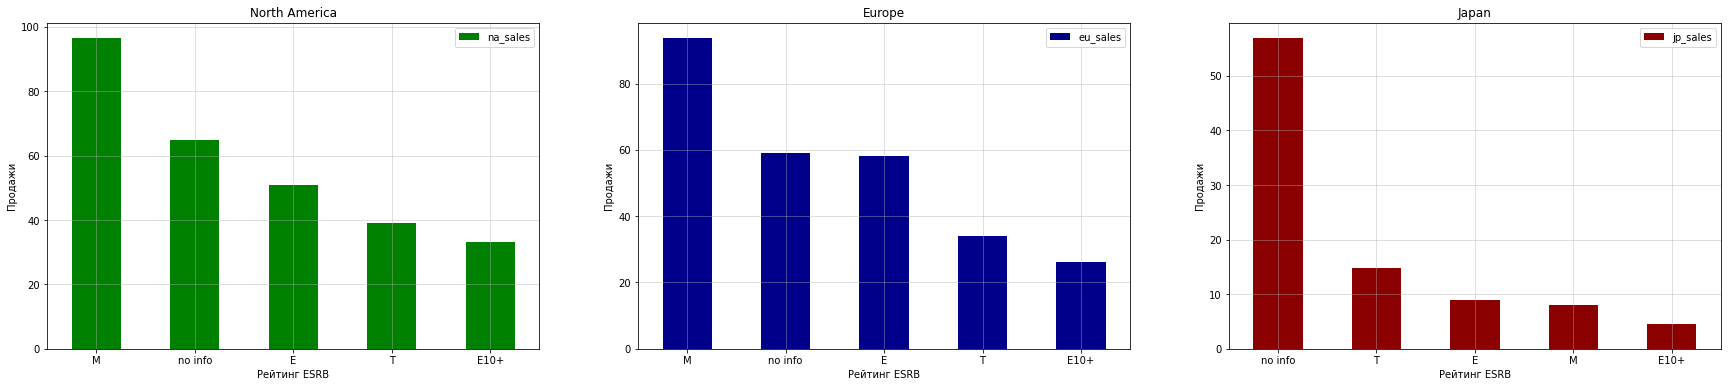

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))

top_region_sales('rating', 'na_sales', 0)
top_region_sales('rating', 'eu_sales', 1)
top_region_sales('rating', 'jp_sales', 2)

<u>**Вывод:**</u> в Северной Америке и в Европе картина полностью совпадает: большая часть продаж пришлась на игры с рейтингом **`M` - для детей от 17 лет и старше**, меньшая часть - на игры с рейтингом **`E10+` - для детей от 10 лет и старше**. В Японии самая крупная доля приходится на игры, где не указана информация о рейтинге. Возможно, так получилось из-за того, что японским играм в большинстве своём присваивает возрастной рейтинг организация CERO (Computer Entertainment Rating Organization), имеющая свою собственную систему оценки.

## Шаг 5. Проверка гипотез

### Гипотеза № 1

<u>**Вопрос заказчика**</u>: Явлвяются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковыми?

**Проверка гипотезы:** средние пользовательские рейтинги платформ Xbox One и PC являются одинаковыми.

---
**H_0:** Средние пользовательские рейтинги (`user_score`) платформ Xbox One и PC одинаковые.

**H_1:** Средние пользовательские рейтинги (`user_score`) платформ Xbox One и PC различаются.

---
**alpha = 0.05**

In [57]:
rating_xbox_one = data_games[data_games['platform'] == "XOne"]['user_score'].dropna()
rating_pc = data_games[data_games['platform'] == "PC"]['user_score'].dropna()

# проводим ttest для двух выборок, добавляем дополнительный праметр
# equal_var = True, который будет считать дисперсии выборок равными

results = st.ttest_ind(rating_xbox_one, 
                       rating_pc,
                       equal_var = True)

# зададим уровень статистической значимости

alpha = 0.05

# выведем на экран полученное p-значение

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1269024252036148
Не получилось отвергнуть нулевую гипотезу


<u>**Вывод:**</u> не получилось отвергнуть нулевую гипотезу => **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

### Гипотеза № 2

<u>**Вопрос заказчика**</u>: Явлвяются ли средние пользовательские рейтинги жанров Action и Sports разными?

**Проверка гипотезы:** Средние пользовательские рейтинги жанров Action и Sports являются разными.

---
**H_0:** Средние пользовательские рейтинги (`user_score`) жанров Action и Sports одинаковые.

**H_1:** Средние пользовательские рейтинги (`user_score`) жанров Action и Sports различаются.

---
**alpha = 0.05**

In [58]:
rating_action = data_games[data_games['genre'] == "Action"]['user_score'].dropna()
rating_sports = data_games[data_games['genre'] == "Sports"]['user_score'].dropna()

# проводим ttest для двух выборок, добавляем дополнительный праметр
# equal_var = False, который НЕ будет считать дисперсии выборок равными

results = st.ttest_ind(rating_action, 
                       rating_sports,
                       equal_var = False)

# зададим уровень статистической значимости

alpha = 0.05

# выведем на экран полученное p-значение

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


<u>**Вывод:**</u> отвергаем нулевую гипотезу => **средние пользовательские рейтинги жанров Action и Sports различаются.**

## Общий вывод

Для заказчика было проведено исследование исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах с 1980 по 2016 года. Цель исследования заключалась в следующем: выявить определяющие успешность игры закономерности для планирования рекламных кампаний.

Для анализа заказчик предоставил файл в CSV-формате. В файле были представлены следующие данные:

* **`Name`** — название игры;
* **`Platform`** — платформа;
* **`Year_of_Release`** — год выпуска;
* **`Genre`** — жанр игры;
* **`NA_sales`** — продажи в Северной Америке (миллионы проданных копий);
* **`EU_sales`** — продажи в Европе (миллионы проданных копий);
* **`JP_sales`** — продажи в Японии (миллионы проданных копий);
* **`Other_sales`** — продажи в других странах (миллионы проданных копий);
* **`Critic_Score`** — оценка критиков (максимум 100);
* **`User_Score`** — оценка пользователей (максимум 10);
* **`Rating`** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

---
Сначала был проведён первичный анализ данных, где были выявлены проблемы в виде пропущенных значений и несоответствия типа данных столбцов описанию из документации. Подробнее см. **[Результаты и выявленные проблемы первичного анализа данных](#first_results)**.

---
Затем проведена предобработка данных, после которой стало возможным использовать датафрейм для исследовательского анализа. Подробнее см. **[Результаты предобработки данных](#preprocessing_results)**.

---
На этапе исследовательского анализа сначала были изучены данные **за 37 лет с 1980 по 2016 г.**, где мы узнали количество выпущенных игр за все годы и продажи по платформам, а также определили срок жизни каждой из платформ, который составляет примерно **9-10 лет**. После этого в качестве актуального периода был выбран **период с 2014 по 2016 год** (причины выбора описаны в **[разделе 3.2](#actual_period)**). Данные за это время были использованы для оновного анализа, результаты которого представлены ниже:

1. В 2014-2016 гг. наблюдается общая тенденция снижения продаж, и в 2016 году такое снижения произошло по всем платформам. Потенциально прибыльными можно считать только 3 платформы:

   * **PS4** (на 2016 год 69,25 млн. проданных копий) - дата выхода: **2013 год**, предполагаемый "срок жизни": **до 2022-2023 г.**
   * **XOne** (на 2016 год 26,15 млн. проданных копий) - дата выхода: **2013 год**, предполагаемый "срок жизни": **до 2022-2023 г.**
   * **3DS** (на 2016 год 15,14 млн. проданных копий) - дата выхода: **2011 год**, предполагаемый "срок жизни": **до 2020-2021 г.**

2. Наибольшие медианные продажи (2014-2016 гг.) наблюдаются у платформ:

   * **XOne**
   * **WiiU**
   * **PS4**

3. Наименьшие медианные продажи (2014-2016 гг.) демонстрируют платформы:

   * **PSP**
   * **PSV**
   * **PC** (Персональный компьютер)

4. В целом по всем платформам за период с 2014 по 2016 г. прослеживается слабая прямая связь между оценкой критиков и продажами, т.е. **оценка критиков - это один из факторов, влияющих на увличение продаж игр**, чего не скажешь об оценках пользователей. Исключением стала платформа WiiU, где оценка пользователей равнозначна оценке критиков, здесь также прослеживается слабая прямая связь.

5. Жанры-лидеры по продажам за период с 2014 по 2016 г.:

   * **Асtion** - продано 199,71 млн. копий;
   * **Shooter** - продано 170,94 млн. копий;
   * **Sports** - продано 109,48 млн. копий;
   * **Role-Playing** - продано 101,44 млн. копий;
   * **Misc** - продано 37,55 млн. копий.


6. Жанры-лидеры по количеству выпущенных игр за период с 2014 по 2016 г.: 

    * **Асtion** - выпущено 620 игр;
    * **Role-Playing** - выпущена 221 игра;
    * **Adventure** - выпущено 185 игр;
    * **Sports** - выпущена 161 игра.;
    * **Shooter** - выпущено 128 игр.

7. Наибольшие медианные продажи (2014-2016 гг.) наблюдаются у жанров:

    * **Shooter**
    * **Sports** 
    * **Platform**
    * **Fighting**
    * **Role-Playing**

8. Наименьшие медианные продажи (2014-2016 гг.) наблюдаются у жанров:

    * **Adventure**
    * **Puzzle**
    * **Strategy**
    * **Racing**
    * **Misc**

9. Cамый прибыльный жанр - **Shooter**, а самый неприбыльный - **Adventure**.

---
Проведено исследование портрета пользователя в 3 регионах:

* Северная Америка (NA)
* Европа (EU)
* Япония (JP)

Определены **самые популярные платформы (топ-5)** за период с 2014 по 2016 г. 

В Северной Америке и Европе предпочитают практические одни и те же платформы, однако в Европе многие играют в игры на персональном компбютере. Но в Японии совершенно другая ситуация. Японцы, по всей видимости, отдают предпочтение только приставкам собственного производства, в топ-5 не представлена ни одна платформа американской компании Xbox. Кроме того, 3-е место по популярности занимает портативная приставка PSV. Все это даёт нам право утверждать, что японский рынок игр является уникальным. Подробнее см. в **[разделе 4.1](#top_platforms)**).

Определены **самые популярные жанры игр (топ-5)** за период с 2014 по 2016 г.

B в Северной Америке и в Европе предпочтения по жанрам практически совпадают, однако в Европе любят игры жанра **Racing** (гонки), в то время как американцы больше играют в игры, объединяющие в себе несколько жанров (**Misc**). Японцы, как и в случае с платформами, показали совсем иной результат. В Японии геймеры больше всего играют в игры жанра **Role-Playing**, а также предпочитают жанр **Fighting** (жанр компьютерных игр, имитирующих рукопашный бой малого числа персонажей в пределах ограниченного пространства, называемого ареной). Подробнее см. в **[разделе 4.2](#top_genres)**).

Определено **влияние рейтинга ESRB на продажи** за период с 2014 по 2016 г.

В Северной Америке и в Европе картина полностью совпадает: большая часть продаж пришлось на игры с рейтингом **`M` - для детей от 17 лет и старше**, меньшая часть - на игры с рейтингом **`E10+` - для детей от 10 лет и старше**. В Японии самая крупная доля приходится на игры, где не указана информация о рейтинге. Возможно, так получилось из-за того, что японским играм в большинстве своём присваивает возрастной рейтинг организация CERO (Computer Entertainment Rating Organization), имеющая свою собственную систему оценки. Подробнее см. в **[разделе 4.3](#rating)**).

---
Проверены гипотезы:

**Гипотеза 1:** средние пользовательские рейтинги платформ Xbox One и PC являются одинаковыми.

<u>**Вывод:**</u> не получилось отвергнуть нулевую гипотезу => **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

**Гипотеза 2:** Средние пользовательские рейтинги жанров Action и Sports являются разными.

<u>**Вывод:**</u> нулевая гипотеза отвергнута => **средние пользовательские рейтинги жанров Action и Sports различаются.**

---
**РЕЗУЛЬТИРУЮЩИЙ ВЫВОД:**

По результатам исследования можно утверждать, что на конец 2016 года игра будет иметь наибольший успех на мировом рынке, если будут соблюдены следующие факторы:

1. Игра выпущена для платформы **PS4** или **XOne**;
2. Игра **высоко** оценена критиками;
3. Жанр игры: **Shooter**;
4. Рейтинг игры по версии американской ассоциации ESRB - **`M` (для детей от 17 лет и старше)**.

Выпуск игры принесёт наибольшие убытки станет, если:

1. Игра выпущена для портативной приставки **PSP**;
2. Игра **низко** оценена критиками;
3. Жанр игры: **Adventure**;
4. Рейтинг игры по версии американской ассоциации ESRB - **`E10+` - для детей от 10 лет и старше**.

Таким образом, рынку компьютерных игр следует ориентироваться на новейшие стационарные платформы с широкими игровыми возможносятми. Портативные приставки доживают свои последние годы, и в ближайшем будущем они будут полностью вытеснены смартфонами и планшетами. Не стоит делать ставку на современных детей и подростков, так как у текущего поколения интересы меняются с небывалой ранее скоростью, и их довольно сложно привлечь на долгое время. С молодыми людьми старше 18 лет дела обстоят по-другому, для многих из них видеоигра - это один из способов проведения досуга. Большой популярностью среди данной группы людей пользуются так называемые "стрелялки", поэтому очень важно обращать внимание именно на этот жанр. Игра должна быть высококачественным продуктом, который пользователи захоят приобрести, и который будет не только отвечать современным тенденциям, но и будет сам задавать тренды.

Данные факторы следует учесть при планировании рекламных компаний.